# Exploratory Data Analysis of  <img src="https://storage.googleapis.com/pr-newsroom-wp/1/2023/05/Spotify_Primary_Logo_RGB_Black.png" style="height:21px" /> **Spotify's Most Streamed Songs 2023**





### **overview of the program**
#### This project aims to conduct an **Exploratory Data Analysis (EDA)** on the “Most Streamed Spotify Songs 2023” dataset, which is freely available on [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). The dataset provides comprehensive details about popular tracks on Spotify, including metrics such as the number of streams, release dates, and musical characteristics like tempo, danceability, and energy.


#### The objective of this analysis is to discern insights into trends and characteristics that may contribute to the popularity of a song. By employing a data-driven approach, this analysis provides a comprehensive understanding of the factors that contribute to the success of a track on Spotify in the current year, 2023.

#### Spotify streaming trends in 2023 are analyzed using Pandas, Matplotlib, and Seaborn. The analysis explores dataset structure, descriptive statistics, and correlations between musical attributes and streams.

--------------------------------------------------------------------------------------------------------------------------------------------

##### <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQB8L4b-L3W8NmRyxFh0rJnwprnAt0Imc8t-wmHPfMRPuODX_WGezsJsKx8dWWG9GpLtX0&usqp=CAU" style="height:23px"/>  *`imports the required libraries`*



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br/>

# <img src="https://static.thenounproject.com/png/860626-200.png" style="height:22px"/> **01 Overview of Dataset**

In [20]:
#loading the dataset
dataset = pd.read_excel('spotify-2023.xlsx')
dataset #displays the dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [22]:
#displays the datatypes of each columns of the dataset
dataset.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [108]:
#identifies for any missing value/s
missing_values = dataset.isnull().sum()
missing_dataset = missing_values[missing_values > 0].reset_index()

#creates a dataframe for better and clean ui
missing_dataset.columns = ['Column', 'Missing Values']

#prints dataframe of columns with missing value/s
missing_dataset

,Column,Missing Values
0,streams,1
1,in_shazam_charts,50
2,key,95


### **<img src="https://static-00.iconduck.com/assets.00/info-icon-2048x2048-tcgtx810.png" style="height:19px"/> About the Dataset**
##### The imported dataset consists of `953 rows and 24 columns`, indicating a sizable amount of data. Each row represents a unique observation, while the 24 columns capture various attributes or features of these observations. This dataset structure suggests it's suitable for analysis, exploration, and potential machine learning applications if it contains relevant and well-organized data types.
------------------------------------------------------------------------------------------------------------------------
#### **📊 Dataset comprises 24 columns, each with a specific data type this includes:**
##### **1️⃣ integer columns (18)**
these columns contain the following data types: artist_count (integer), released_year (integer), and various playlist/chart indicators (integer).
##### **2️⃣ text columns (5)**
columns like `track_name`, `artist(s)_name`, `streams`, `key`, and `mode` hold text or categorical data.
##### **3️⃣ decimal column (1)**
the `in_shazam_charts` column is the only one with decimal values, indicating it may store more precise numerical data.

------------------------------------------------------------------------------------------------------------------------

#### **🚩 Missinge Values**:  
##### `in_shazam_charts` has 50 missing values, and `key` has 95 missing values.

------------------------------------------------------------------------------------------------------------------------




<br/>
<br/>

# <img src="https://cdn-icons-png.flaticon.com/512/63/63880.png" style="height:22px"/> **02 Basic Descriptive Statistics**

In [283]:
#calculates the mean, median, and standard deviation of the 'streams' column
streams_mean = dataset['streams'].mean()
streams_median = dataset['streams'].median()
streams_std = dataset['streams'].std()

#creates a dataframe for the result
statistics_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Stream Values': [streams_mean, streams_median, streams_std]})

#sets the values to float instead of scientific notation due to larger sum
pd.set_option('display.float_format', '{:.2f}'.format)

#displays the data
statistics_df

,Statistic,Stream Values
0,Mean,514137424.94
1,Median,290530915.00
2,Standard Deviation,566856949.04


In [251]:
#calculates the mean, median, and standard deviation of the 'streams' column
streams_mean = dataset['streams'].mean()
streams_median = dataset['streams'].median()
streams_std = dataset['streams'].std()

#creates a dataframe for the result
statistics_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Stream Values': [streams_mean, streams_median, streams_std]})

#sets the values to float instead of scientific notation due to larger sum
pd.set_option('display.float_format', '{:.2f}'.format)

#displays the data
statistics_df

,Statistic,Stream Values
0,Mean,514137424.94
1,Median,290530915.00
2,Standard Deviation,566856949.04


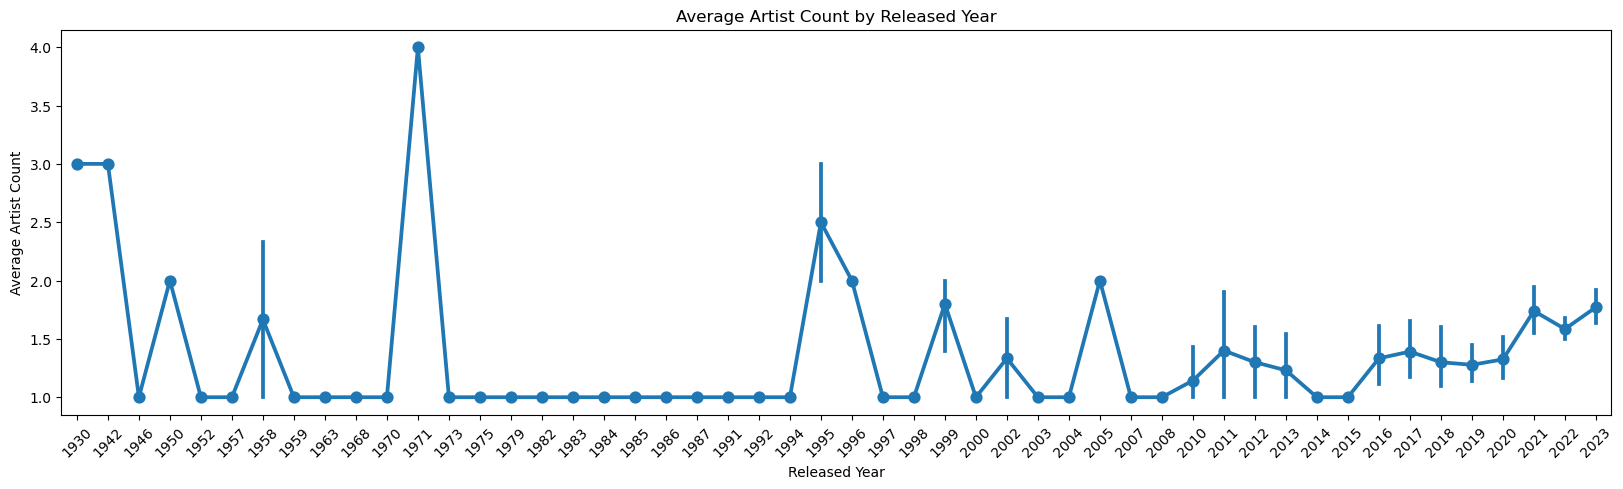

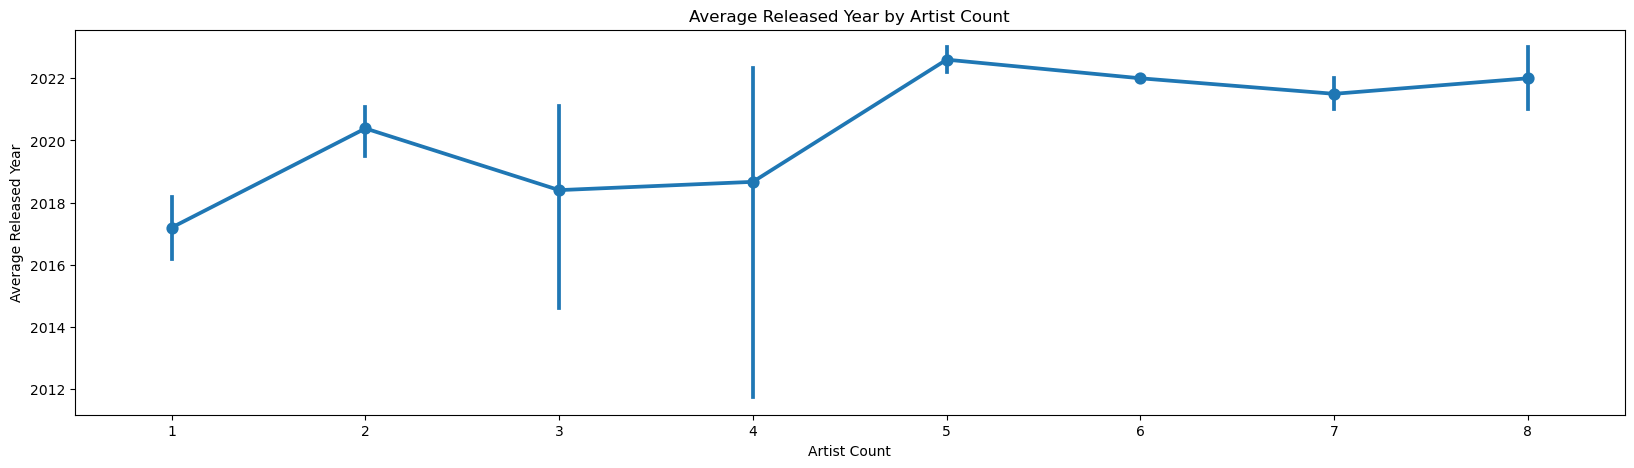

In [437]:
#distribution of 'released_year' and 'artist_count' 
#will utilize point plot 

#released_year distribution plot
plt.figure(figsize=(20, 5)) #plot dimensions (width, height)
sns.pointplot(x='released_year', y='artist_count', data=dataset, estimator='mean') #plot data source
plt.title('Average Artist Count by Released Year') #add title
plt.xlabel('Released Year') #add legend on the x axis
plt.ylabel('Average Artist Count') #add legend on the y axis
plt.xticks(rotation=45) #to make years visible not to overlap
plt.show() #displays the plot

#artist_count distribution plot
plt.figure(figsize=(20, 5)) #plot dimensions (width, height)
sns.pointplot(x='artist_count', y='released_year', data=dataset, estimator='mean') #plot data source
plt.title('Average Released Year by Artist Count') #add title
plt.ylabel('Average Released Year') #add legend on the x axis
plt.xlabel('Artist Count') #add legend on the y axis
plt.show() #displays the plot

### **<img src="https://img.freepik.com/premium-vector/observation-icon-vector-image-can-be-used-data-analytics_120816-290408.jpg" style="height:28px"/> Observation from the Plot**

#### **Distribution of Released Year and Artist Count**
##### The artist count varies significantly throughout the **1930s to 1970s**, with occasional spikes in 1942, 1957, and 19708. From the mid-1970s to the 1990s, the artist count remained low, reflecting a solo-artist era. From the 2000s, there’s a noticeable trend of increasing artist counts, peaking in recent years, suggesting a shift towards more collaborative tracks.

##### Tracks with a low artist count (1-3 artists) are associated with earlier years, reflecting the prevalence of solo or small-group performances in past music trends. Conversely, recent years (closer to 2020 and beyond) have seen an increase in the average number of artists per track, reflecting the modern music industry’s emphasis on collaborations to reach wider audiences and blend genres.


#### **Trend and Outlierss**
##### The **general trend indicates a rising prevalence of artist collaborations, particularly since the 2000s**. This phenomenon reflects the evolving nature of the music industry, where collaborations have gained popularity and proven to be mutually beneficial. Notably, there are occasional spikes in the average artist count during specific years in the earlier decades (e.g., 1942, 1957, and 1970). These spikes could be attributed to the occurrence of unique or rare collaborative projects.

*The distribution suggests a historical transition from solo tracks to more collaborative endeavors. There are notable outliers in earlier years, where exceptionally high artist counts were recorded for specific years.*

<br/>
<br/>

# <img src="https://cdn-icons-png.flaticon.com/512/14/14265.png" style="height:27px"/> **03 Top Perfomers**

In [379]:
#finds the top 5 with highest values in 'streams' column
top_tracks_df = dataset[['artist(s)_name', 'track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

#creates dataframe to customize the table column name
top_tracks_df.columns = ['Artist', 'Track', 'Stream Count']

#displays the data
top_tracks_df                   

,Artist,Track,Stream Count
55,The Weeknd,Blinding Lights,3703895074.00
179,Ed Sheeran,Shape of You,3562543890.00
86,Lewis Capaldi,Someone You Loved,2887241814.00
620,Tones and I,Dance Monkey,2864791672.00
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550.00


In [407]:
#count the occurrences of each artist
artist_counts = dataset['artist(s)_name'].value_counts()

#creates dataframe from the series and displays only 5 values
top_artists_df = pd.DataFrame({'Artist': artist_counts.index, 'Count': artist_counts.values}).head(5)

#displays the data
top_artists_df

,Artist,Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


### **<img src="https://cdn-icons-png.flaticon.com/512/441/441424.png" style="height:24px"/> Analysis**
#### Top 5 most streamed songs on Spotify include “Blinding Lights” by The Weeknd and “Shape of You” by Ed Sheeran. Taylor Swift has the most songs in the top 500 Spotify streams, followed by The Weeknd, Bad Bunny, and Harry Styles.


<br/>
<br/>

# <img src="https://cdn-icons-png.flaticon.com/512/6020/6020005.png" style="height:31px"/> **04 Temporal Trends**

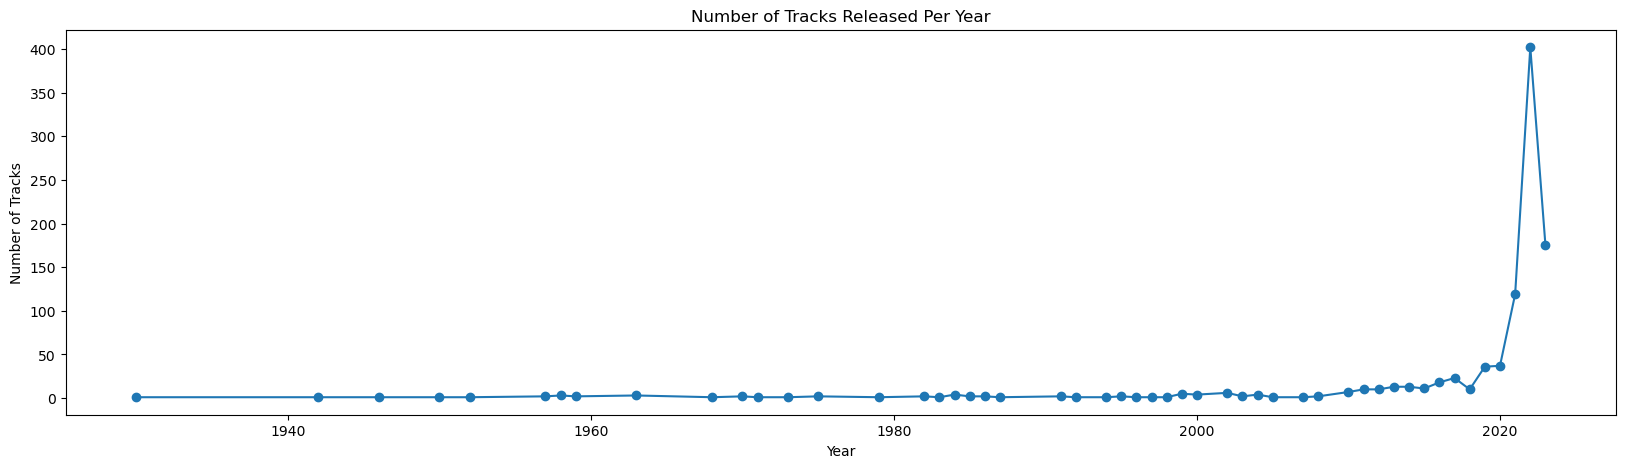

In [535]:
#number of tracks per year
#using matplotlib (plot)
plt.figure(figsize=(20, 5)) #sets the figure size
tracks_per_year = dataset['released_year'].value_counts().sort_index() #estimator
tracks_per_year.plot(ls='-', marker = 'o') #customizing the plot (linestyle, marker style)
plt.title("Number of Tracks Released Per Year") #title
plt.xlabel("Year") #x-axis label
plt.ylabel("Number of Tracks") #y-axis label
plt.show() #displays the plot

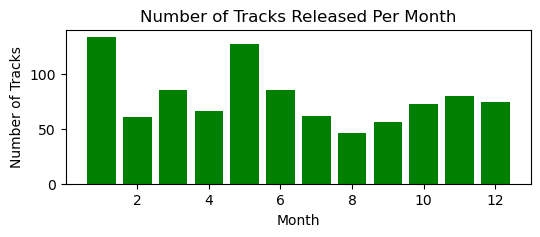

In [549]:
#number of trakcs per month
#using matplotlib (bar)
plt.figure(figsize=(6, 2)) #sets the figure size
tracks_per_month = dataset['released_month'].value_counts().sort_index()
plt.bar(tracks_per_month.index, tracks_per_month.values, color='g') #customizing the plot (color)
plt.title("Number of Tracks Released Per Month") #title
plt.xlabel("Month") #x-axis label
plt.ylabel("Number of Tracks") #y-axis label
plt.show() #displays the plot

### **<img src="https://static.vecteezy.com/system/resources/thumbnails/021/017/659/small_2x/3d-illustration-of-management-data-analysis-png.png" style="height:40px"/> Yearly & Monthly Trends**

#### **Trends Per Year**
##### The number of tracks released annually has been rising, especially in the **2020s**. This growth is likely due to the music industry’s expansion and digital streaming platforms like Spotify, which make it easier for artists to release music. Notably, 2021 and 2022 saw spikes in releases, possibly because of increased streaming accessibility for both independent and mainstream artists. In contrast, the 1930s to early 2000s saw stable and low release numbers due to limited music production and distribution during those years.

#### **Monthly Patterns**
##### Analyzing monthly music releases, January and May peak with new tracks. Artists strategically plan releases to coincide with summer’s higher listener engagement. The remaining months have moderate distribution, with slight fluctuations around July and September. Data shows annual growth and seasonal patterns shape artists’ and record labels’ release strategies

<br/>
<br/>

# <img src="https://static-00.iconduck.com/assets.00/music-notes-icon-2048x2046-o5kli2nk.png" style="height:27px"/> **05 Genre and Music Characteristics**

<function matplotlib.pyplot.show(close=None, block=None)>

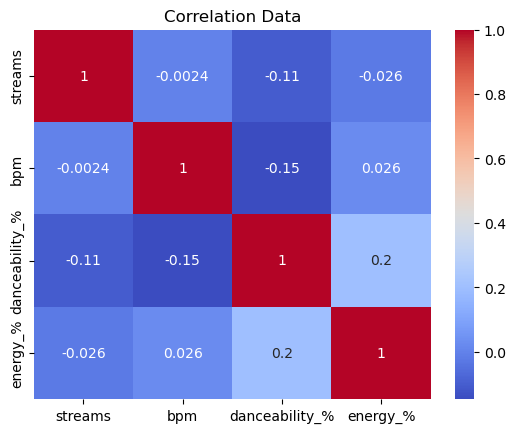

In [565]:
#sets the data to corrolate
correlation_data = dataset[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()

#will utilize seaborn in creating a correlation matrix (heatmap)
sns.heatmap(correlation_data, annot = True, cmap = 'coolwarm') #seaborn heatmap
plt.title("Correlation Data") #title
plt.show #displays the heatmap

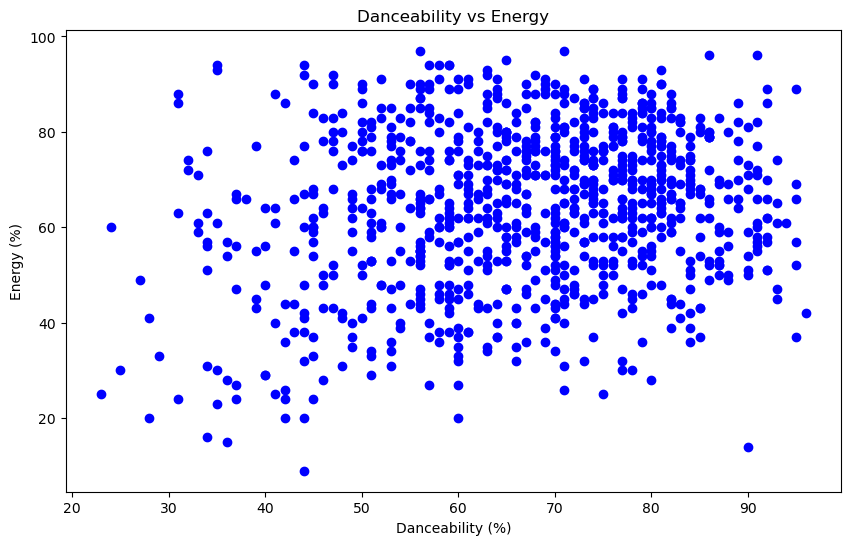

In [583]:
#danceability vs. energy data
#will use matplotlib
plt.figure(figsize=(10, 6)) #sets the figure size
plt.scatter(dataset['danceability_%'], dataset['energy_%'], color='b') #customizing the plot (color)
plt.title("Danceability vs Energy") #title
plt.xlabel("Danceability (%)") #x-axis label
plt.ylabel("Energy (%)") #y-axis label
plt.show() #displays the plot

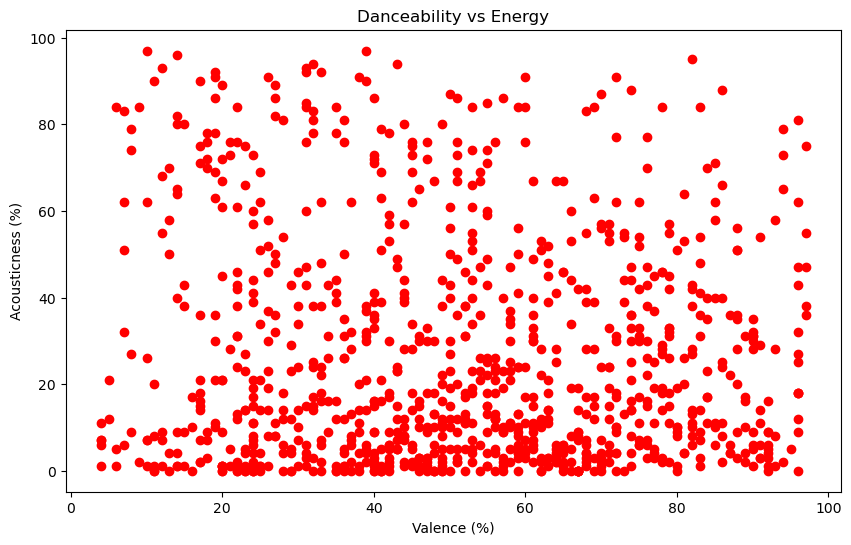

In [589]:
#valence vs. acousticness data
#will use matplotlib
plt.figure(figsize=(10, 6)) #sets the figure size
plt.scatter(dataset['valence_%'], dataset['acousticness_%'], color='r') #customizing the plot (color)
plt.title("Danceability vs Energy") #title
plt.xlabel("Valence (%)") #x-axis label
plt.ylabel("Acousticness (%)") #y-axis label
plt.show() #displays the plot

### **<img src="https://cdn-icons-png.flaticon.com/512/5747/5747842.png" style="height:38px"/> Data Analysis**

#### **Correlation**
##### Danceability is positively correlated with energy and streams, while tempo is negatively correlated with danceability, suggesting faster songs are less danceable.

#### **Danceability vs Energy**
##### The scatter plot shows a moderate positive correlation between danceability and energy. Songs with higher energy tend to be more danceable, but other factors may also influence danceability.

#### **Valence vs Acousticness**
##### The scatter plot illustrates a weak positive correlation between acousticness and valence. While songs with higher acousticness tend to have slightly higher valence, the relationship is not strong. Other factors likely play a more significant role in determining a song’s valence.



<br/>
<br/>

# **06 Platform Popularity**

<img src="https://www.masteringbox.com/_next/image?url=https%3A%2F%2Fwww.masteringbox.com%2Fwp-content%2Fuploads%2F2022%2F11%2FBest-Streaming-Services-1.png&w=3840&q=75"  style="size:20px; align=center"> 





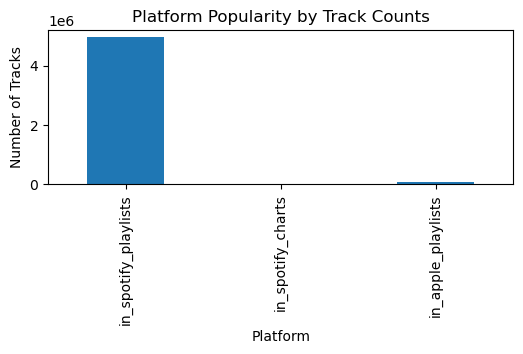

In [680]:
#gathers the data in three columns
platform_popularity = dataset[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()

#will utilize matplotlib to create a graph data
plt.figure(figsize=(6, 2)) #sets the figure size
platform_popularity.plot(kind='bar') #type of plot (bar graph)
plt.title("Platform Popularity by Track Counts") #title
plt.xlabel("Platform") #x-axis label
plt.ylabel("Number of Tracks") #y-axis label 
plt.show() #displays the graph

### **<img src="https://hips.hearstapps.com/hmg-prod/images/best-music-streaming-services-647ded40196e5.png" style="height:22px"/> Platform Popularity**
##### Spotify playlists boast the most tracks, implying a preference for popular songs. In contrast, Apple Music playlists have the least tracks, indicating a more selective approach.



<br/>
<br/>

# <img src="https://www.shutterstock.com/image-vector/advanced-analytics-icon-line-vector-600nw-2396491191.jpg" style="height:42px"/> **07 Advanced Analysis**

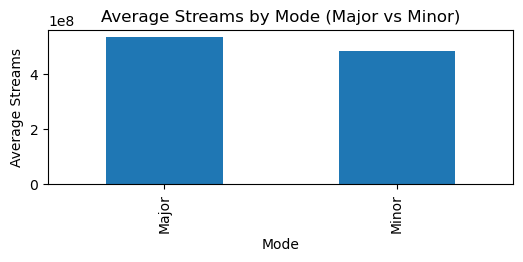

In [708]:
#patterns in key or mode
mode_pattern = dataset.groupby('mode')['streams'].mean() #data input
plt.figure(figsize=(6, 2)) #sets the figure size
mode_pattern.plot(kind='bar') #matplotlib characteristic (bar)
plt.title("Average Streams by Mode (Major vs Minor)") #title
plt.xlabel("Mode") #x-axis label
plt.ylabel("Average Streams") #y-axis label
plt.show() #displays the graph

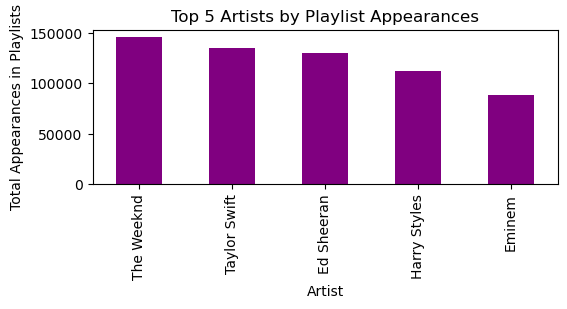

In [740]:
artist_playlist = (dataset.groupby('artist(s)_name')[['in_spotify_playlists', 
                    'in_spotify_charts', 'in_apple_playlists']].sum() #input data
                    .sum(axis=1)  #summing across playlist/chart columns
                    .sort_values(ascending=False) #sets to descending
                    .head(5))#get top 5 most frequent artists in playlists/charts)

#plotting using matplotlib, the top 5 most frequently appearing artists in playlists
plt.figure(figsize=(6, 2)) #sets the figure size
artist_playlist.plot(kind='bar', color='purple') #plot characteristics
plt.title("Top 5 Artists by Playlist Appearances") #title
plt.xlabel("Artist") #x-axis label
plt.ylabel("Total Appearances in Playlists") #y-axis label
plt.show() #display

--------------------------------------------------------------------------------------------------------------------------------------------

##### *End of program*

##### back to GitHub repository: https://github.com/ramongerix/ECE2112-Spotify-2023-EDA